In [1]:
%load_ext autoreload
%autoreload 2
from Network import Network
from FrankWolf import *
from EntropyMaximisation import *
from RemoveBraess import *

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import seaborn.objects as so

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


## SiouxFalls

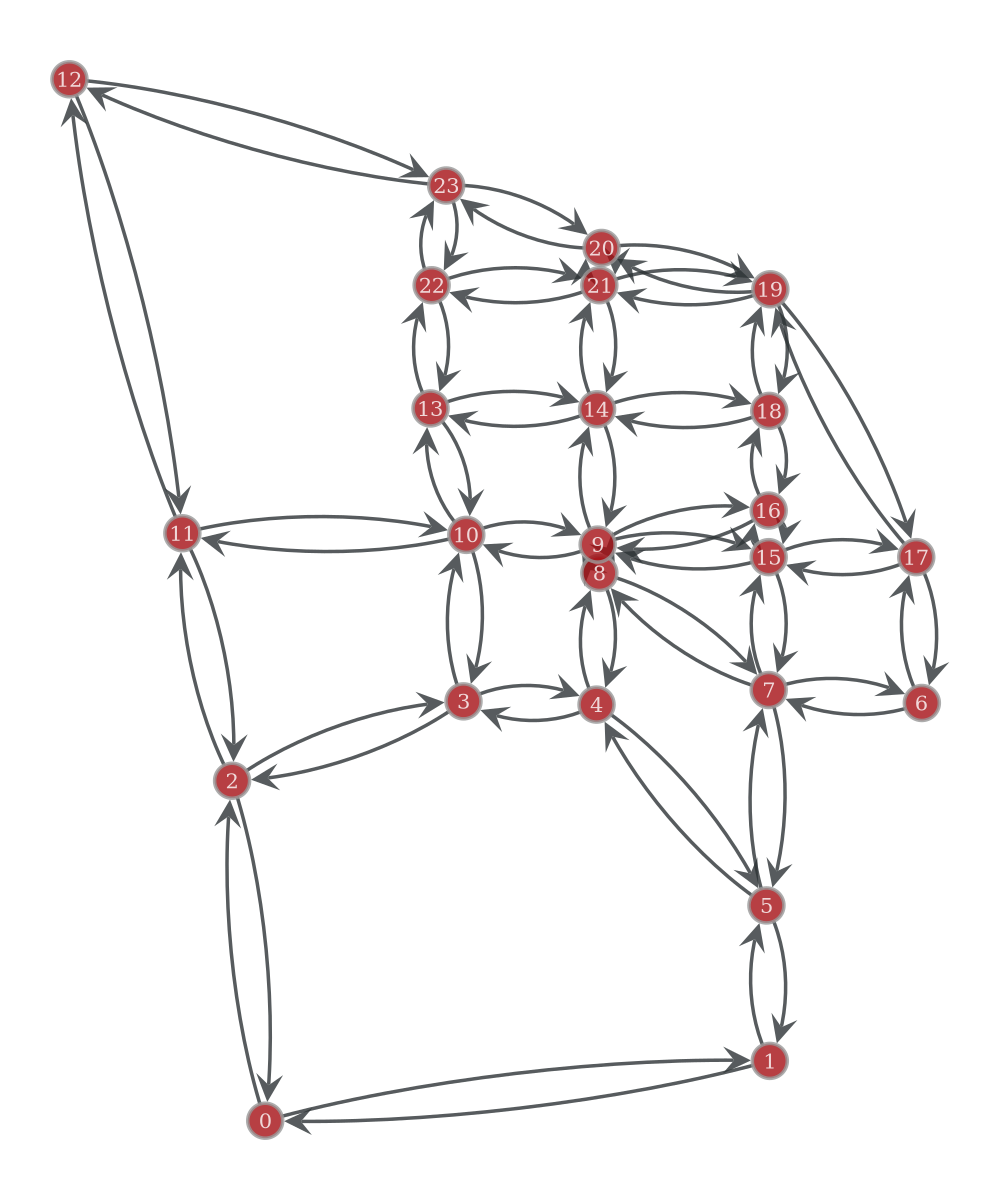

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9d28f43320, at 0x7f9cf1eff5c0>

In [2]:
net = Network("SiouxFalls")
net.draw()

In [ ]:
# Run the frankwolf algorith and save the results
frankwolf_by_origin, frankwolf_flows = frankwolf(net, net.trips, verbose=1, tolerance= 1e-6, n_max=2e5)
net.save_flow(frankwolf_by_origin, "FrankWolf_by_origin")
net.save_flow(frankwolf_flows, "UE")

"""
Performance :

1e-4 in ~1 min
1e-5 in ~10 min
1e-6 in ~1h30
1e-7 in > 3h
"""

In [ ]:
# Save the results
net.save_flow(frankwolf_by_origin, "FrankWolf_by_origin")
net.save_flow(frankwolf_flows, "UE")

In [9]:
frankwolf_flows_by_origin, UE_flows = net.load_flow("FrankWolf_by_origin"), net.load_flow("UE")

In [10]:
# Compare the results with the ones availlable online
computed_flows = pd.DataFrame(net.get_edges([UE_flows]), columns=["From", "To", "FrankWolf"])
computed_flows[["From", "To"]] += 1
computed_flows = computed_flows.set_index(["From", "To"])
net.TNTP_flows.columns = net.TNTP_flows.columns.str.rstrip()
df = net.TNTP_flows.set_index(["From", "To"]).join(computed_flows, how="outer")
df["Diff"] = df["Volume"] - df["FrankWolf"]
df.sample(5)

,,Volume,Cost,FrankWolf,Diff
From,To,,,,
10,11,17726.625033,12.405689,17726.612937,0.012096
3,4,14006.371020,4.269402,14006.521938,-0.150918
24,23,7861.833244,3.722947,7861.808117,0.025126
21,24,10309.410804,11.924060,10309.375010,0.035794
22,21,8607.387930,4.201050,8607.382335,0.005595


In [ ]:
flows_by_o = EMARB(net, frankwolf_by_origin, 1)
net.save_flow(flows_by_o, "EMARB_result")

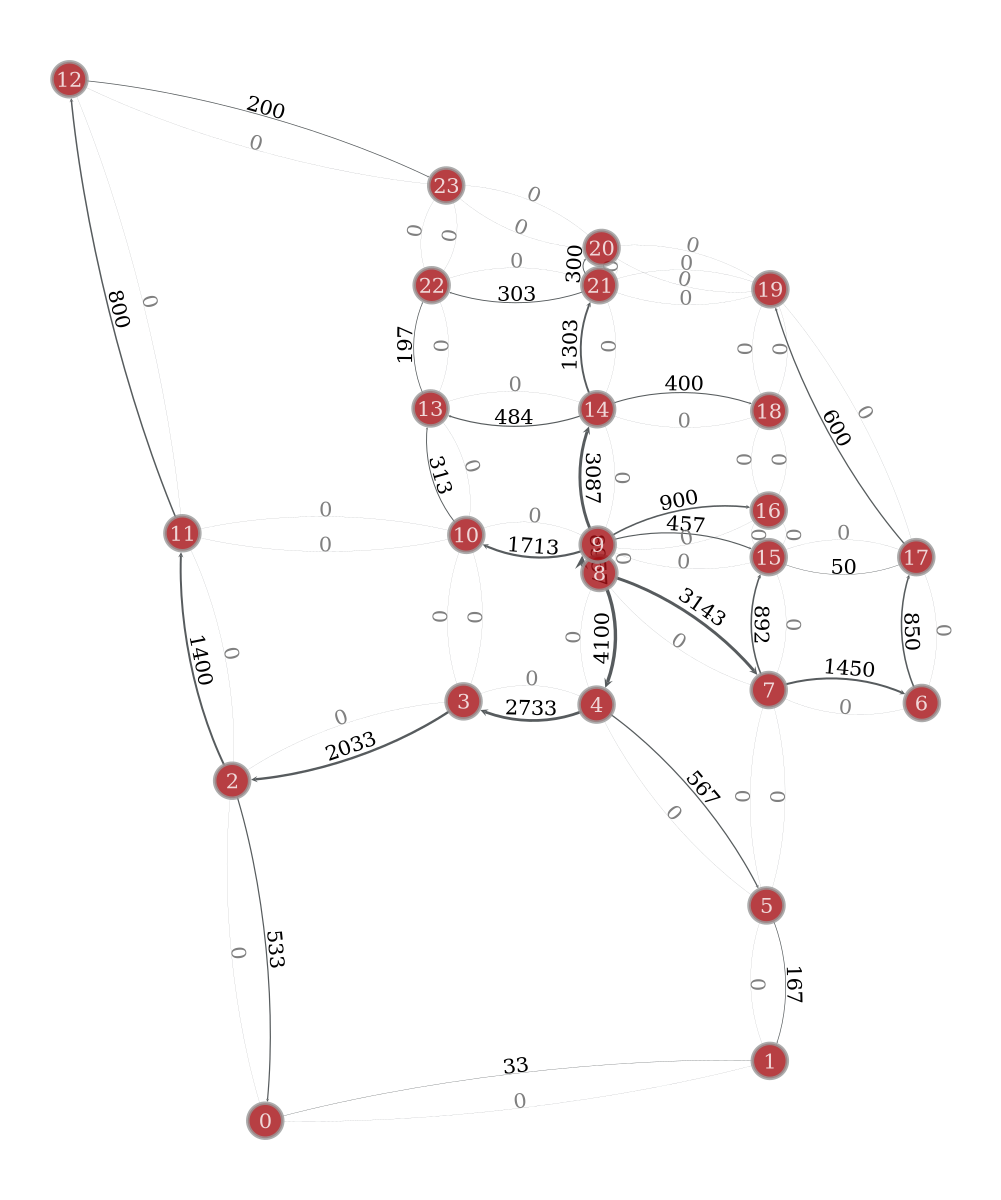

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8d8cda3b60, at 0x7f8d86fd1fd0>

In [11]:
EMARB_flows = net.load_flow("EMARB_result")
EMARB_flows.get_2d_array()

net.draw(flows_by_o = EMARB_flows, o=8)

In [12]:
OD_flows, paths = get_OD_flows(net, net.trips, flows_by_origin=EMARB_flows, flow_limit=1, return_paths=True)
net.save_flow(OD_flows, "OD_flows")

OD_flows

  0%|          | 0/24 [00:00<?, ?it/s]

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [100.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  99.99999999,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        , 399.99699353,   0.        , ...,   0.        ,
         270.3195253 , 129.67746823],
        [  0.        , 299.99972548,   0.        , ...,   0.        ,
           0.        , 299.99972548],
        [  0.        ,  99.99999999,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,  99.99999955, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  99.99999955,  99.99999955, ...,   0.        ,
           0.        ,   0.        ],
        ...,


In [13]:
net.export_flow(OD_flows, "OD_flows", OD_demand=net.trips)

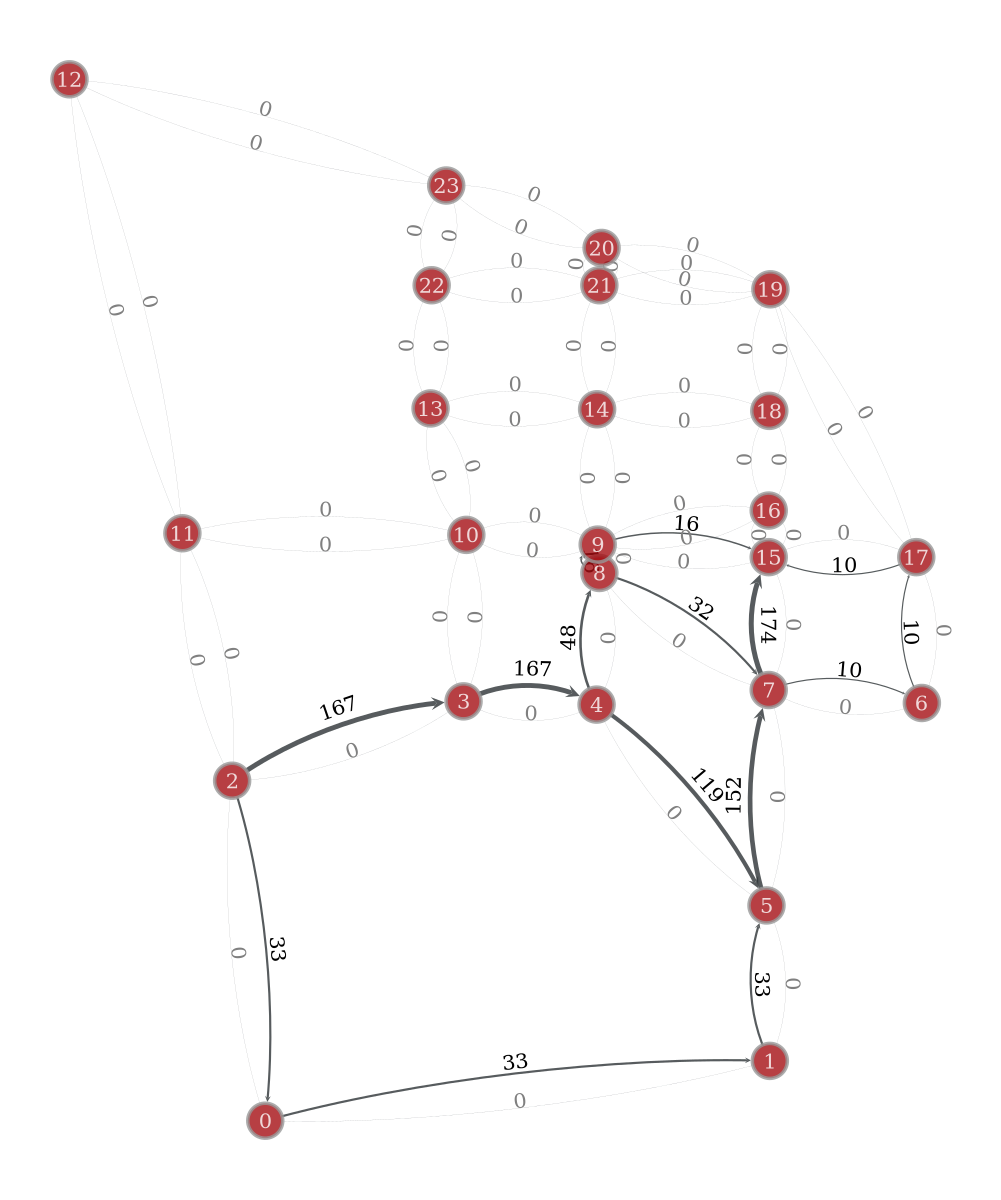

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8d8cda3b60, at 0x7f8d86fddbe0>

In [14]:
net.draw(flows_by_OD = OD_flows, o=2, d=15)

In [15]:
net.export_paths(paths, net.trips)

'  1 ->   0 (100.0):\n\t     100 : [0, 1]\n\n  2 ->   0 (100.0):\n\t     100 : [0, 2]\n\n  3 ->   0 (500.0):\n\t     500 : [0, 2, 3]\n\n  4 ->   0 (200.0):\n\t     200 : [0, 2, 3, 4]\n\n  5 ->   0 (300.0):\n\t     300 : [0, 1, 5]\n\n  6 ->   0 (500.0):\n\t     500 : [0, 1, 5, 7, 6]\n\n  7 ->   0 (800.0):\n\t     800 : [0, 1, 5, 7]\n\n  8 ->   0 (500.0):\n\t     500 : [0, 2, 3, 4, 8]\n\n  9 ->   0 (1300.0):\n\t 1.3e+03 : [0, 2, 3, 4, 8, 9]\n\n 10 ->   0 (500.0):\n\t     500 : [0, 2, 3, 10]\n\n 11 ->   0 (200.0):\n\t     200 : [0, 2, 11]\n\n 12 ->   0 (500.0):\n\t     500 : [0, 2, 11, 12]\n\n 13 ->   0 (300.0):\n\t     300 : [0, 2, 3, 10, 13]\n\n 14 ->   0 (500.0):\n\t     500 : [0, 2, 3, 4, 8, 9, 14]\n\n 15 ->   0 (500.0):\n\t    29.3 : [0, 1, 5, 7, 6, 17, 15]\n\t     471 : [0, 1, 5, 7, 15]\n\n 16 ->   0 (400.0):\n\t     400 : [0, 2, 3, 4, 8, 9, 16]\n\n 17 ->   0 (100.0):\n\t     100 : [0, 1, 5, 7, 6, 17]\n\n 18 ->   0 (300.0):\n\t     300 : [0, 2, 3, 4, 8, 9, 14, 18]\n\n 19 ->   0 (300

In [12]:
# Compute SO flows
SO_fw_by_origin, SO_flows = frankwolf(net, net.trips, cost_function=BTR_marginal_cost_function, verbose=1, tolerance= 1e-4, n_max=2e5)
net.save_flow(SO_fw_by_origin, "SO_fw_by_origin")
net.save_flow(SO_flows, "SO_flows")
net.export_flow(SO_fw_by_origin, "SO_fw_by_origin")
net.export_flow(SO_flows, "SO_flows")

0it [00:00, ?it/s]

In [ ]:
SO_fw_by_origin = net.load_flow("SO_fw_by_origin")
EMARB_SO_flows = EMARB(net, SO_fw_by_origin, 1)
net.save_flow(EMARB_SO_flows, "EMARB_SO_flows")

In [17]:
EMARB_SO_flows = net.load_flow("EMARB_SO_flows")

OD_SO_flows, paths = get_OD_flows(net, net.trips, flows_by_origin=EMARB_SO_flows, flow_limit=1, return_paths=True)
net.save_flow(OD_SO_flows, "OD_SO_flows")
net.export_flow(OD_SO_flows, "OD_SO_flows", OD_demand=net.trips)
net.export_paths(paths, net.trips, name="SO_paths")

OD_SO_flows

  0%|          | 0/24 [00:00<?, ?it/s]

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [100.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  99.99999035,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        , 399.99916353,   0.        , ...,   0.        ,
         122.54013868,  72.92962151],
        [  0.        , 299.99997009,   0.        , ...,   0.        ,
           0.        , 299.99997009],
        [  0.        ,  99.99999008,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,  99.99998449, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  99.99997467,  99.99997467, ...,   0.        ,
           0.        ,   0.        ],
        ...,


In [18]:
OD_flows = net.load_flow("OD_flows")
OD_SO_flows = net.load_flow("OD_SO_flows")
mask = ((OD_flows > 0) & (OD_SO_flows < 0.1))

In [32]:
mask.sum(axis=2)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  2,  2,  0,  0,  0,  0,  2,  0,
         7,  0,  6,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  5,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

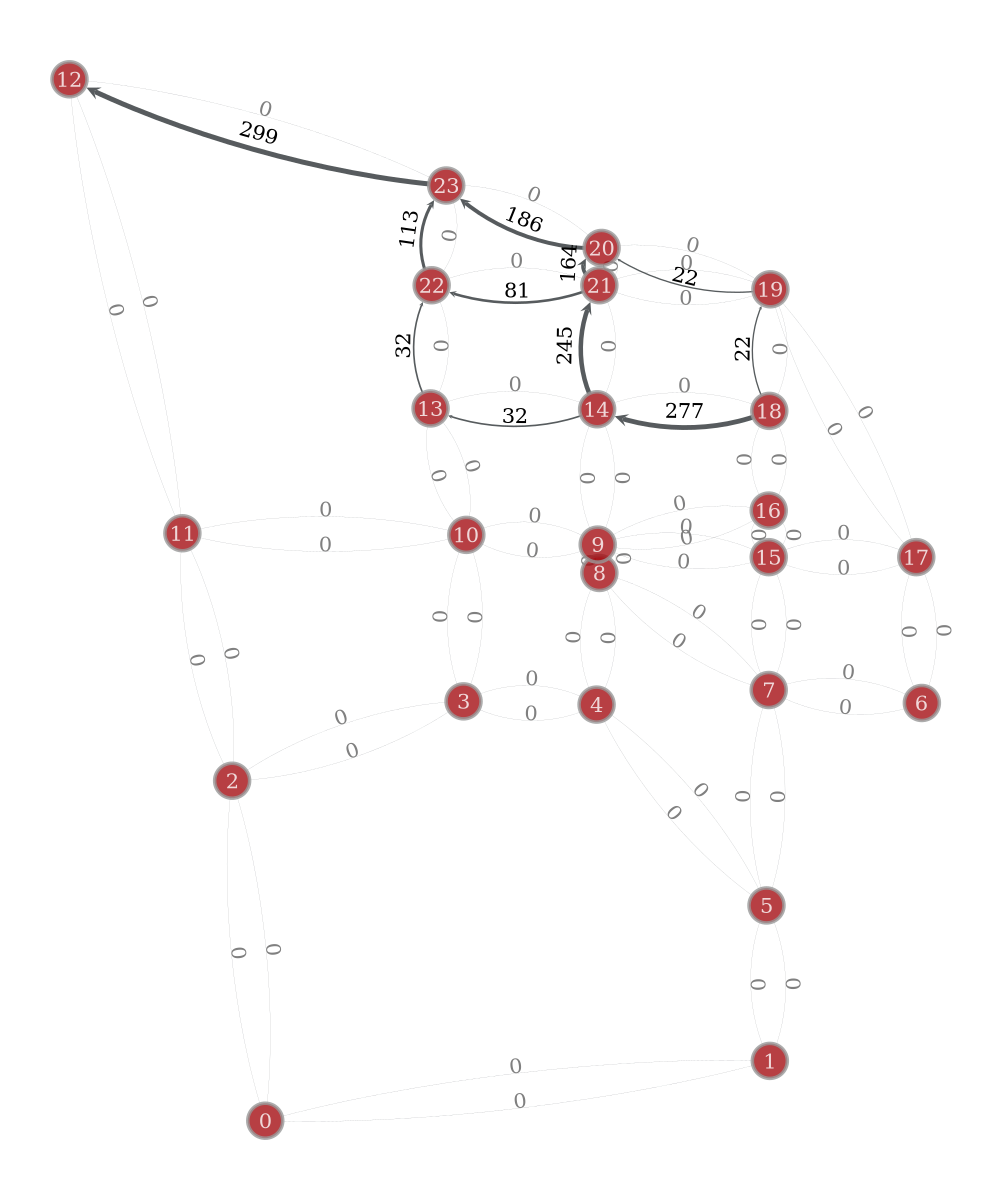

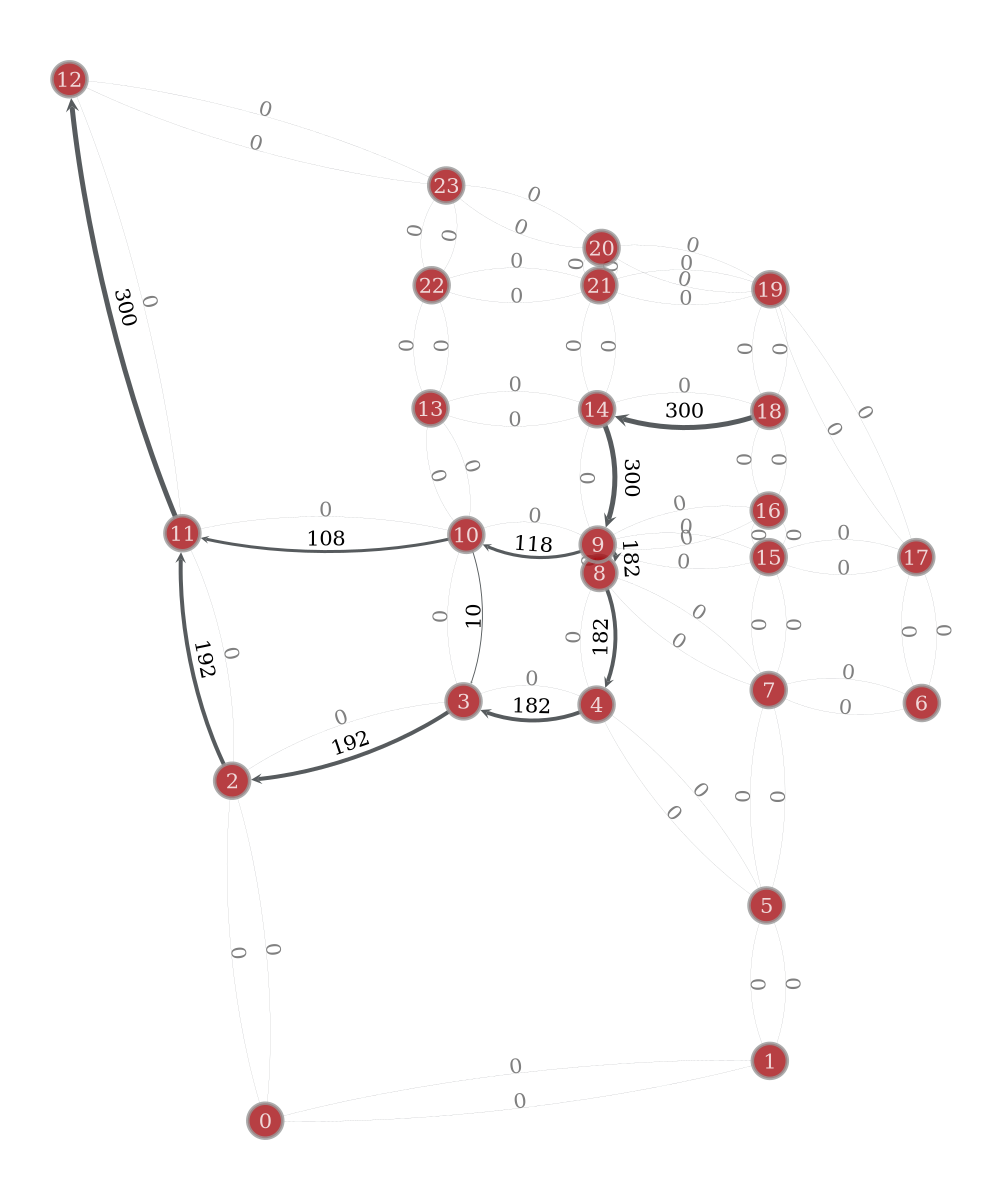

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8aabac60>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8b8db3e0>)

In [33]:
net.draw(flows_by_OD=OD_flows, d=12, o=18), net.draw(flows_by_OD=OD_SO_flows, d=12, o=18)

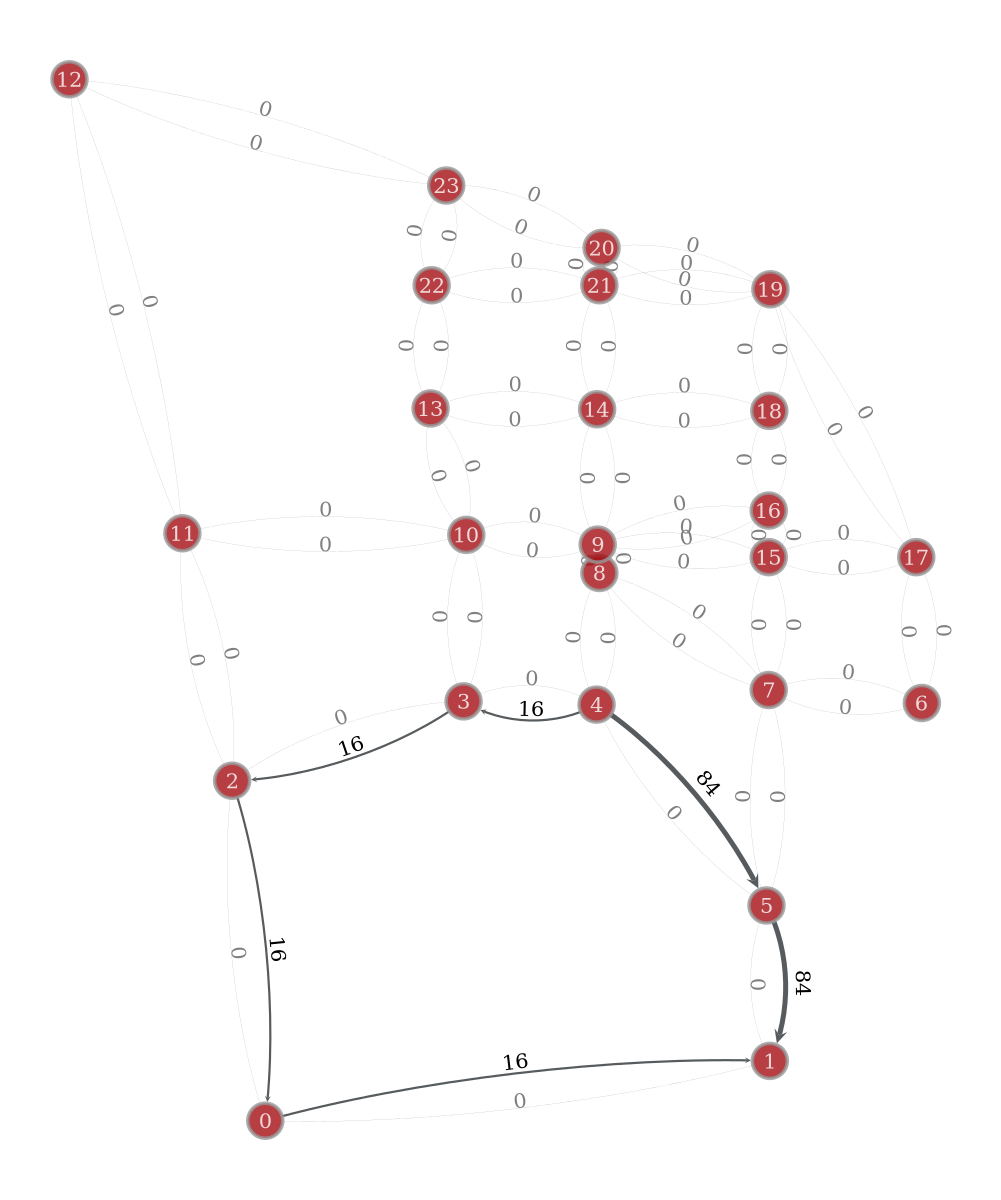

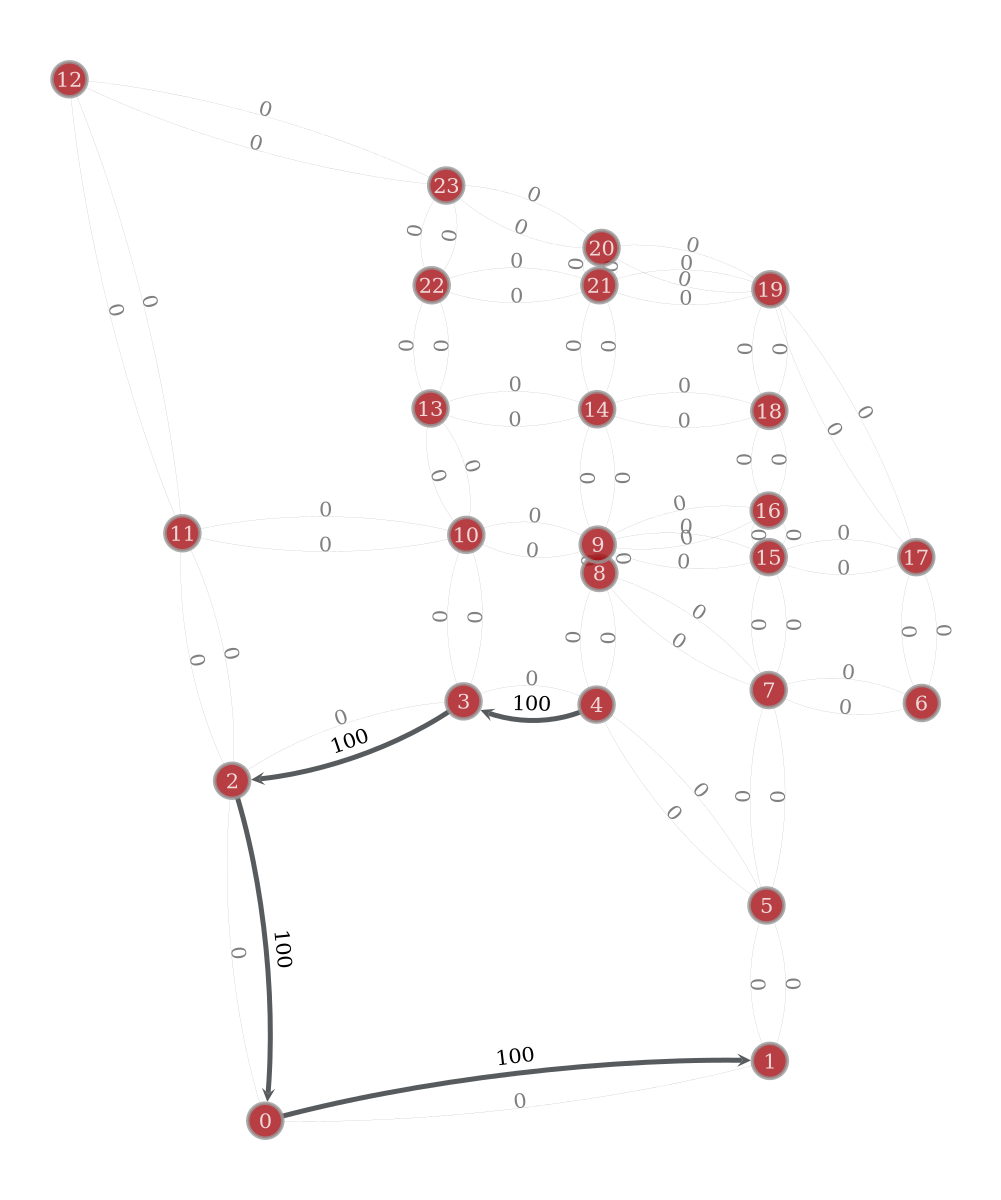

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8b9ce6f0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8b97fcb0>)

In [38]:
net.draw(flows_by_OD=OD_flows, d=1, o=4), net.draw(flows_by_OD=OD_SO_flows, d=1, o=4)

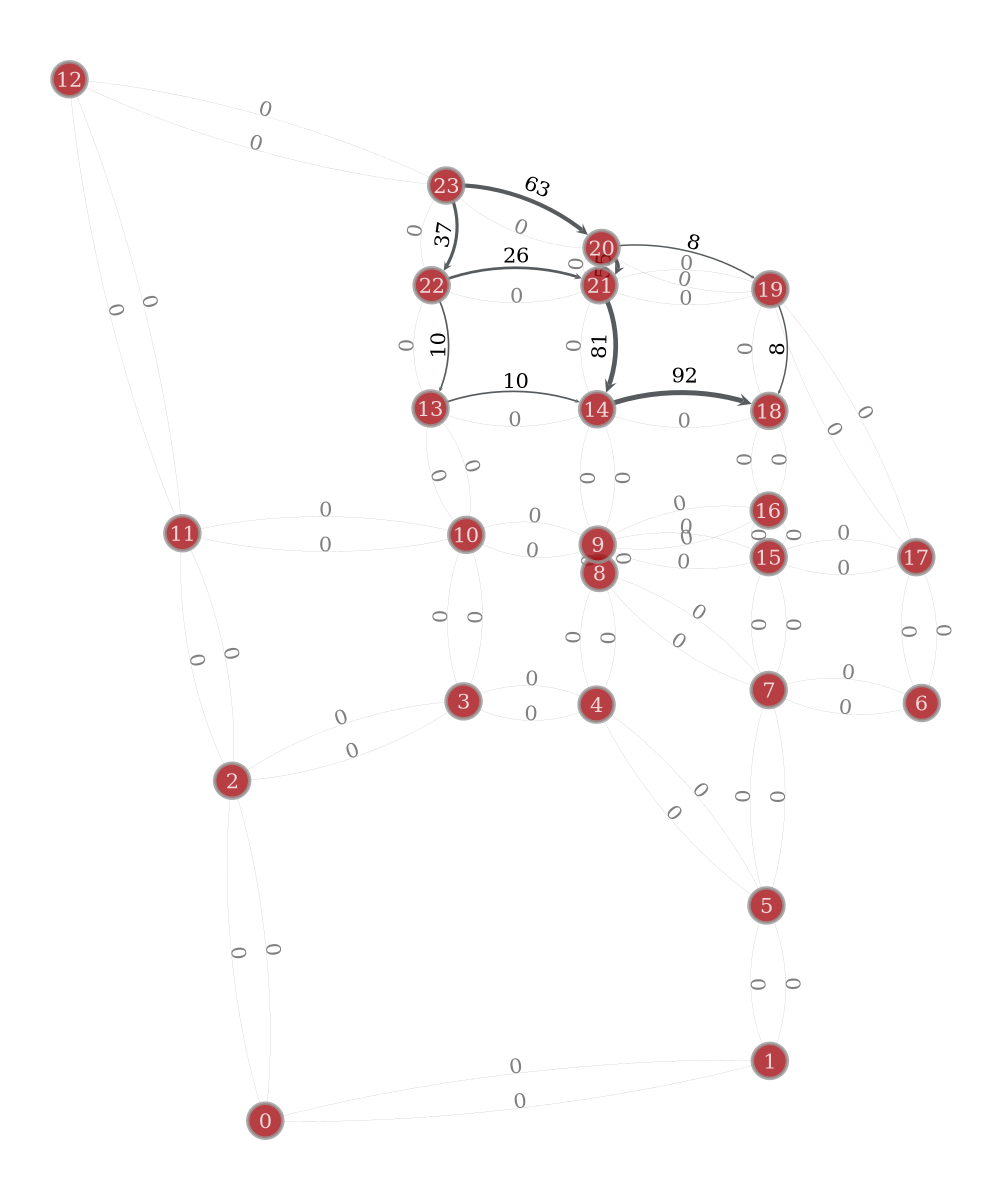

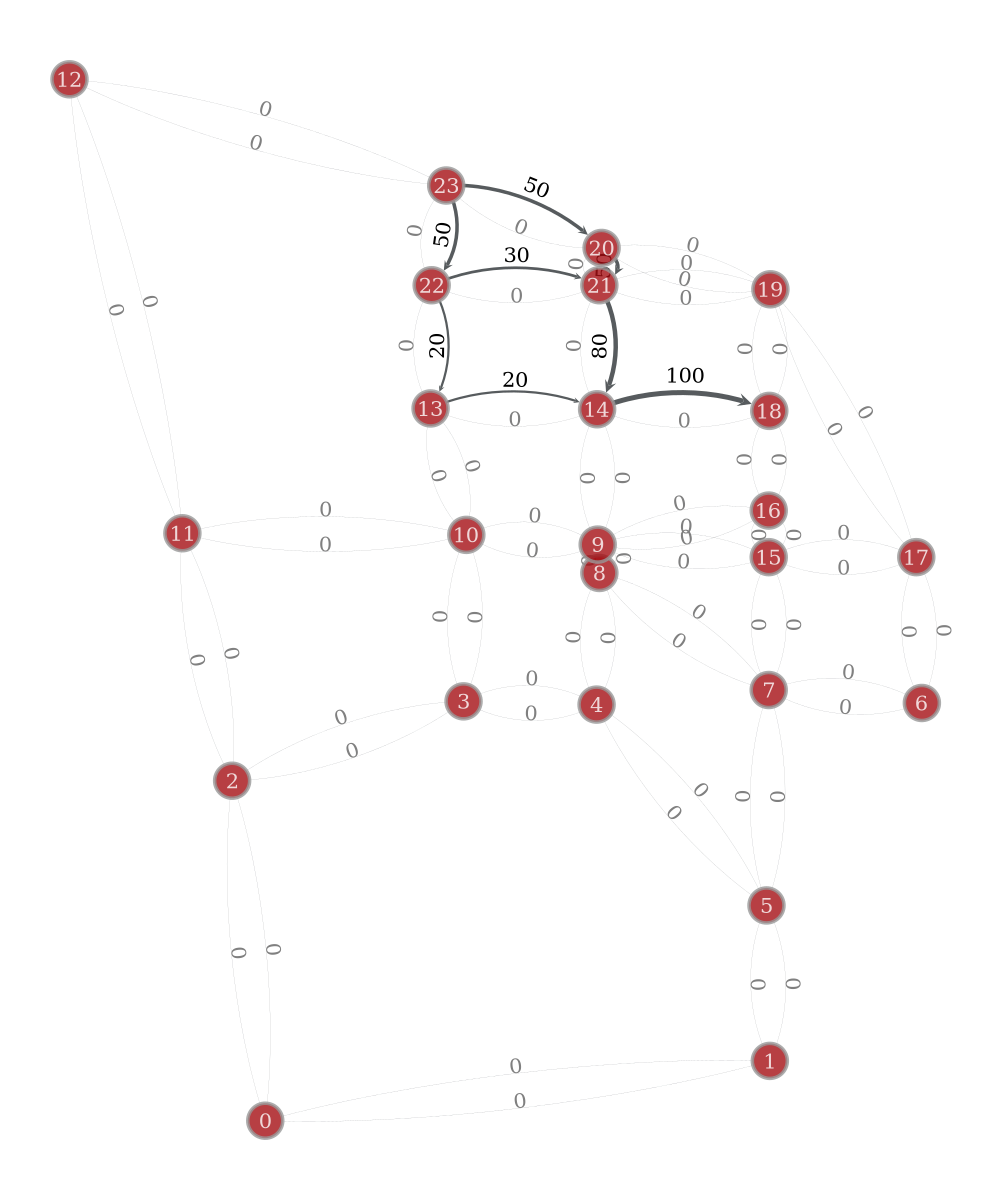

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8aabb320>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a8b9cd850>)

In [36]:
net.draw(flows_by_OD=OD_flows, d=18, o=23), net.draw(flows_by_OD=OD_SO_flows, d=18, o=23)

In [23]:
mask[18,23]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [32]:
# Remove Braess Links for a given OD pair
o, d = 18, 23
masked_by_origin, masked_flows = frankwolf(net, net.trips, OD_mask={(o,d) : ~mask[o,d]}, verbose=1, tolerance= 1e-4, n_max=2e5)
net.save_flow(masked_by_origin, f"o{o}d{d}", folder="files/masked")
net.save_flow(masked_flows, f"o{o}d{d}", folder="files/masked")
net.export_flow(masked_by_origin, f"o{o}d{d}", folder="exports/masked")
net.export_flow(masked_flows, f"o{o}d{d}", folder="exports/masked")

0it [00:00, ?it/s]

### Remove braess links

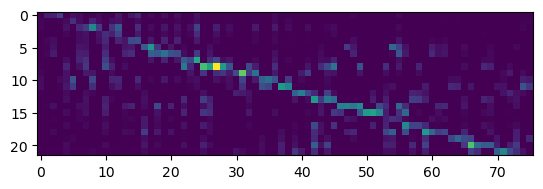

In [22]:
start_flows = OD_flows.sum(axis=1)
plt.imshow(start_flows[[i for i in range(1, 23)], :])

In [29]:
# Remove potential Braess Links for all OD pairs
OD_flows = net.load_flow("OD_flows")
OD_SO_flows = net.load_flow("OD_SO_flows")
results = try_removing_braess(net, OD_flows, OD_SO_flows)
results

  0%|          | 0/65 [00:00<?, ?it/s]

(24, 76)
(24, 76)


array([[3000.        , 5800.        ,    0.        , ...,    0.        ,
         800.        ,  300.        ],
       [   0.        , 1164.59446188, 1264.59446143, ...,    0.        ,
           0.        ,    0.        ],
       [ 252.16809351,    0.        ,    0.        , ...,    0.        ,
          67.57988504,  132.41927735],
       ...,
       [   0.        ,    0.        ,    0.        , ..., 2499.99817147,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., 1899.9999987 ,
         699.98472056,    0.        ],
       [  21.77052464,    0.        ,    0.        , ..., 1799.99621645,
        3231.86628607, 2668.12851269]])

0it [00:00, ?it/s]

(24, 76)
(24, 76)


array([[2599.99980489, 6199.96397216,    0.        , ...,    0.        ,
         370.31952528,  429.67719372],
       [   0.        ,  600.        ,  700.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 252.16809351,    0.        ,    0.        , ...,    0.        ,
          67.57988504,  132.41927735],
       ...,
       [   0.        ,    0.        ,    0.        , ..., 2499.99817147,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., 1899.9999987 ,
         699.98472056,    0.        ],
       [  21.77052464,    0.        ,    0.        , ..., 1799.99621645,
        3231.86628607, 2668.12851269]])

0it [00:00, ?it/s]

Exception ignored in: <function PropertyMap.__del__ at 0x7f9d2832b380>
Traceback (most recent call last):
  File "/home/ars/miniconda3/envs/gt/lib/python3.12/site-packages/graph_tool/__init__.py", line 386, in __del__
    def __del__(self):

KeyboardInterrupt: 


(24, 76)
(24, 76)


array([[2599.99980489, 6199.96397216,    0.        , ...,    0.        ,
         370.31952528,  429.67719372],
       [   0.        ,  700.        ,  800.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 252.16809351,    0.        ,    0.        , ...,    0.        ,
          67.57988504,  132.41927735],
       ...,
       [   0.        ,    0.        ,    0.        , ..., 2499.99817147,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., 1899.9999987 ,
         699.98472056,    0.        ],
       [  21.77052464,    0.        ,    0.        , ..., 1799.99621645,
        3231.86628607, 2668.12851269]])

0it [00:00, ?it/s]

Exception ignored in: <generator object tqdm_notebook.__iter__ at 0x7f9ce2cb5380>
Traceback (most recent call last):
  File "/home/ars/miniconda3/envs/gt/lib/python3.12/site-packages/tqdm/notebook.py", line 255, in __iter__
    self.disp(bar_style='danger')
  File "/home/ars/miniconda3/envs/gt/lib/python3.12/site-packages/tqdm/notebook.py", line 178, in display
    pbar.bar_style = bar_style
    ^^^^^^^^^^^^^^
  File "/home/ars/miniconda3/envs/gt/lib/python3.12/site-packages/traitlets/traitlets.py", line 716, in __set__
    self.set(obj, value)
  File "/home/ars/miniconda3/envs/gt/lib/python3.12/site-packages/traitlets/traitlets.py", line 690, in set
    new_value = self._validate(obj, value)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ars/miniconda3/envs/gt/lib/python3.12/site-packages/traitlets/traitlets.py", line 722, in _validate
    value = self.validate(obj, value)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ars/miniconda3/envs/gt/lib/python3.12/site-packages

KeyboardInterrupt: 

In [6]:
results.Improvement.describe()

count       65.000000
mean      2623.821625
std       6012.966239
min      -1181.135383
25%       -268.097628
50%        -36.438661
75%       2152.688481
max      25431.056662
Name: Improvement, dtype: float64

Text(0, 0.5, 'Improvement in total travel time')

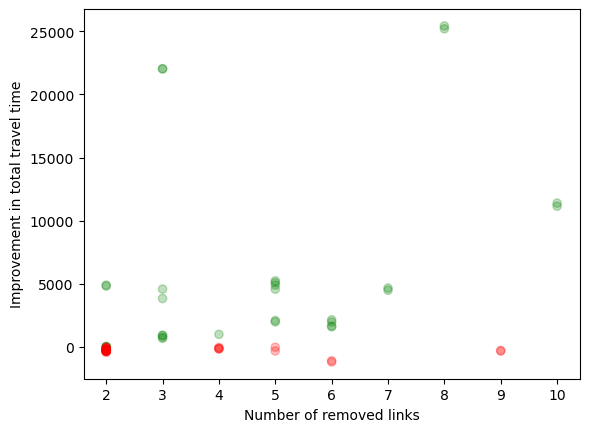

In [7]:
plt.scatter(results["N Removed Links"], results["Improvement"], color = np.where(results["Improvement"]>0, "green", "red"), alpha=0.25)
plt.xlabel("Number of removed links")
plt.ylabel("Improvement in total travel time")

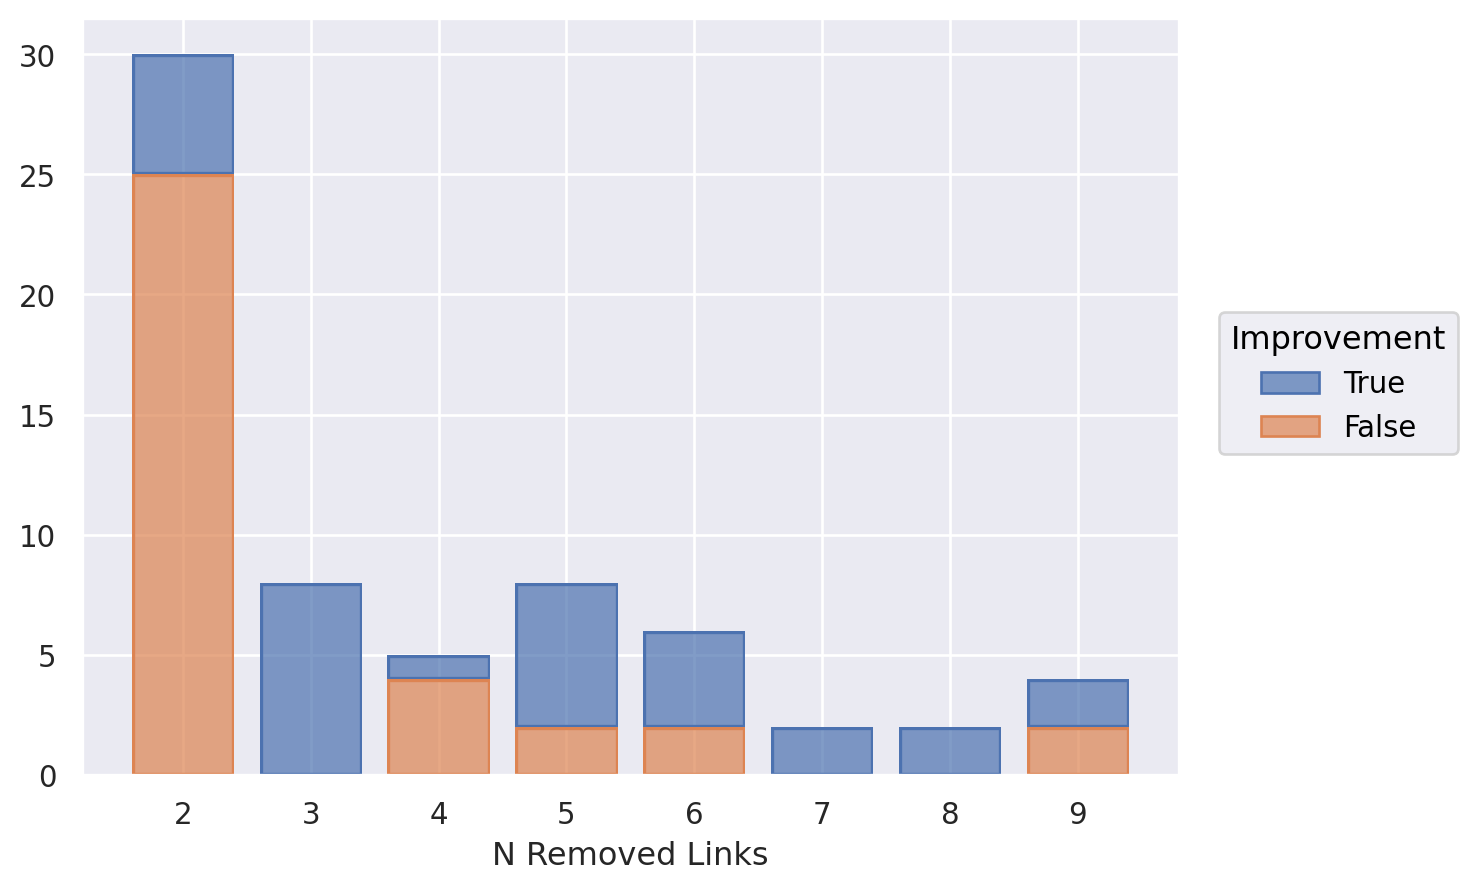

In [8]:
(
    so.Plot(data=results, x="N Removed Links", color=(results.Improvement>0))
    .add(so.Bar(), so.Hist(), so.Stack(), so.Shift(x=-0.5))
    .label()
    .plot()
)

In [9]:
results.sort_values("Improvement", ascending=False)

Removed links  N Removed Links  \
o  d                                                                  
12 14          ([38, 40, 64, 66, 70, 71, 74, 75],)                8   
14 12          ([41, 43, 45, 65, 68, 69, 72, 73],)                8   
13 12                              ([41, 72, 73],)                3   
12 13                              ([38, 70, 75],)                3   
   18  ([38, 40, 60, 63, 64, 66, 70, 71, 74, 75],)               10   
...                                            ...              ...   
16 19                                  ([52, 58],)                2   
3  15                                  ([24, 28],)                2   
18 11                                  ([39, 43],)                2   
19 0                    ([2, 13, 16, 18, 53, 59],)                6   
0  19                    ([0, 3, 15, 17, 19, 55],)                6   

       Total Travel Time   Improvement  
o  d                                    
12 14       7.454079e+06  25431.056662  
14 12       7.454306e+06  25203.901283  
13 12       7.457464e+06  22046.200718  
12 13       7.457486e+06  22024.508772  
   18       7.468115e+06  11394.541178  
...                  ...           ...  
16 19       7.479846e+06   -335.499112  
3  15       7.479882e+06   -371.969391  
18 11       7.479925e+06   -414.728589  
19 0        7.480601e+06  -1090.624021  
0  19       7.480691e+06  -1181.135383  

[65 rows x 4 columns]

## Example

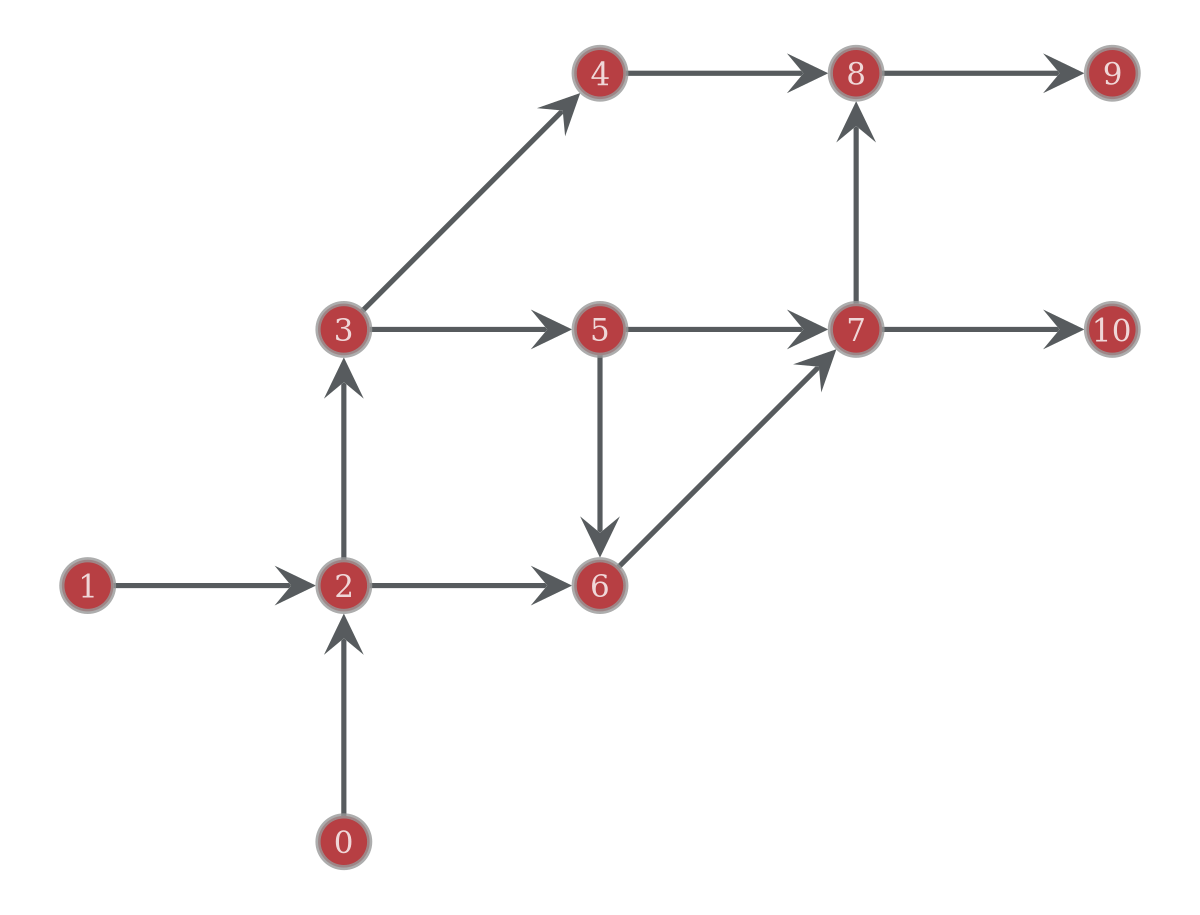

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb52007ecf0>

In [81]:
net = Network("Example")
net.draw()

In [82]:
OD = np.zeros((net.num_vertices(), net.num_vertices()))
OD[0,9] = 200
OD[0, 10] = 160
OD[1, 9] = 80
OD[1, 10] = 40
OD

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200., 160.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  80.,  40.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [90]:
edges_indices = net.get_edges([net.edge_index])
edges_indices[:, :2] +=1
edges_indices

array([[ 1,  3,  0],
       [ 2,  3,  1],
       [ 3,  4,  2],
       [ 3,  7,  3],
       [ 4,  5,  4],
       [ 4,  6,  5],
       [ 5,  9,  6],
       [ 6,  7,  7],
       [ 6,  8,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 8, 11, 11],
       [ 9, 10, 12]])

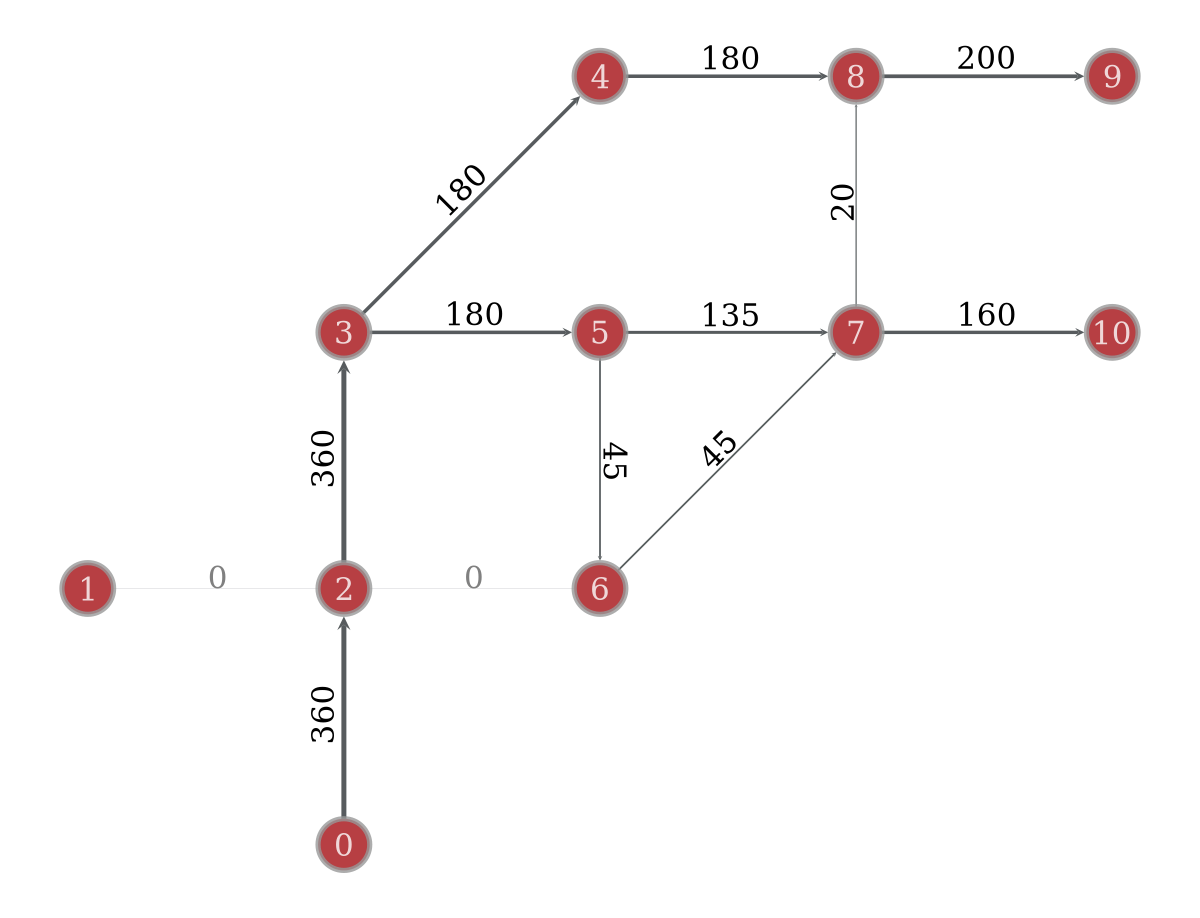

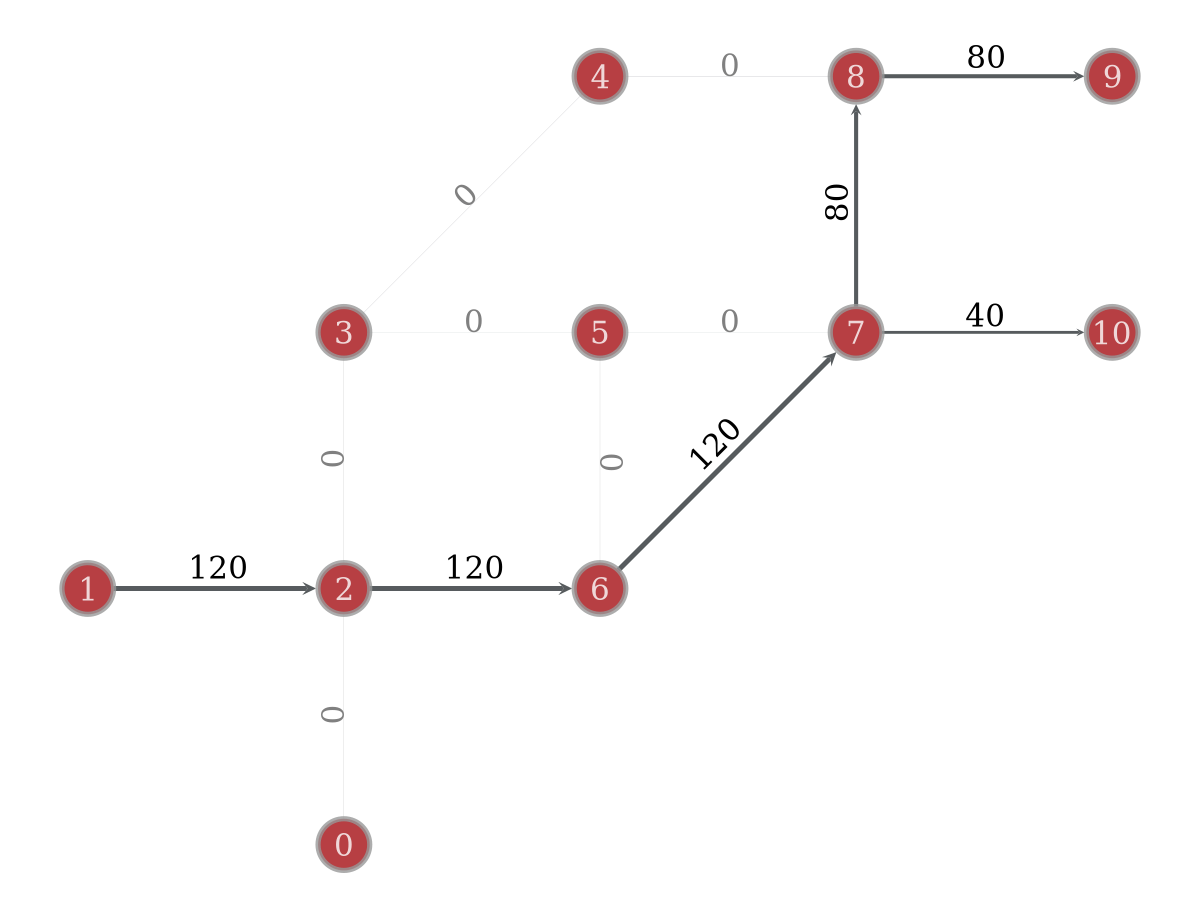

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb585c3f320>

In [92]:
flows_by_o = net.new_edge_property("vector<float>", vals=np.zeros((net.num_edges(), net.num_vertices())))
a = flows_by_o.get_2d_array()
a[0] = [360, 0, 360, 0, 180, 180, 180, 45, 135, 45, 20, 160, 200]
a[1] = [0, 120, 0, 120, 0, 0, 0, 0, 0, 120, 80, 40, 80]
flows_by_o.set_2d_array(a)
net.draw(flows_by_o=flows_by_o, o=0)
net.draw(flows_by_o=flows_by_o, o=1)

In [ ]:
flows_by_o = EMARB(net, frankwolf_by_origin, 1)
net.save_flow(flows_by_o, "EMARB_result")

In [94]:
x_n, residuals = backward_entropy_maximisation(net, flows_by_o, 7)
new_flows = forward_entropy_maximization(net, x_n, residuals, 8)

/home/ars/Braess-Links-Identification/EntropyMaximisation.py:32: RuntimeWarning: invalid value encountered in divide
  psi_r_ij[:, in_edge_indices] = np.where(eta_rj[:,[j]] > 0, x_a[:, in_edge_indices]/eta_rj[:,[j]], 0)


'Graph E'

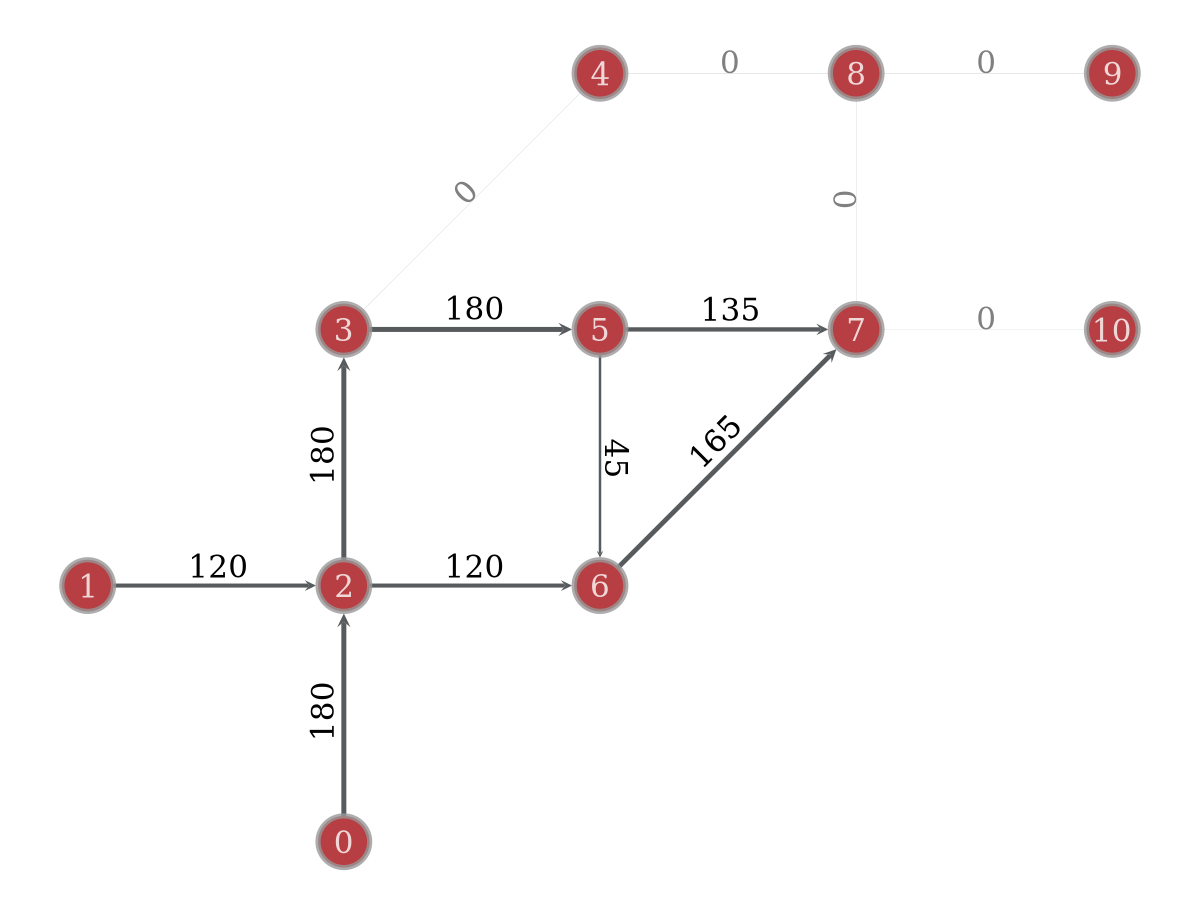

'Graph F'

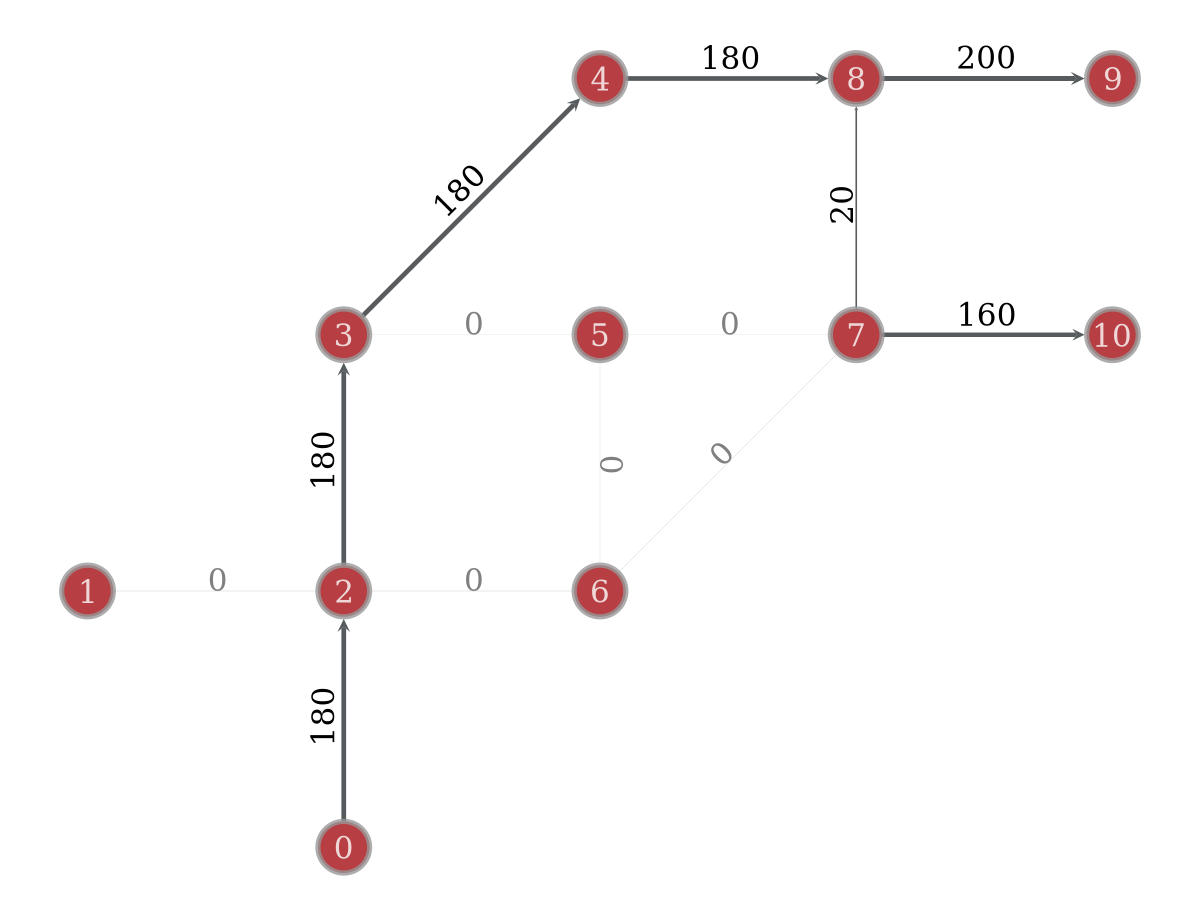

'Graph G'

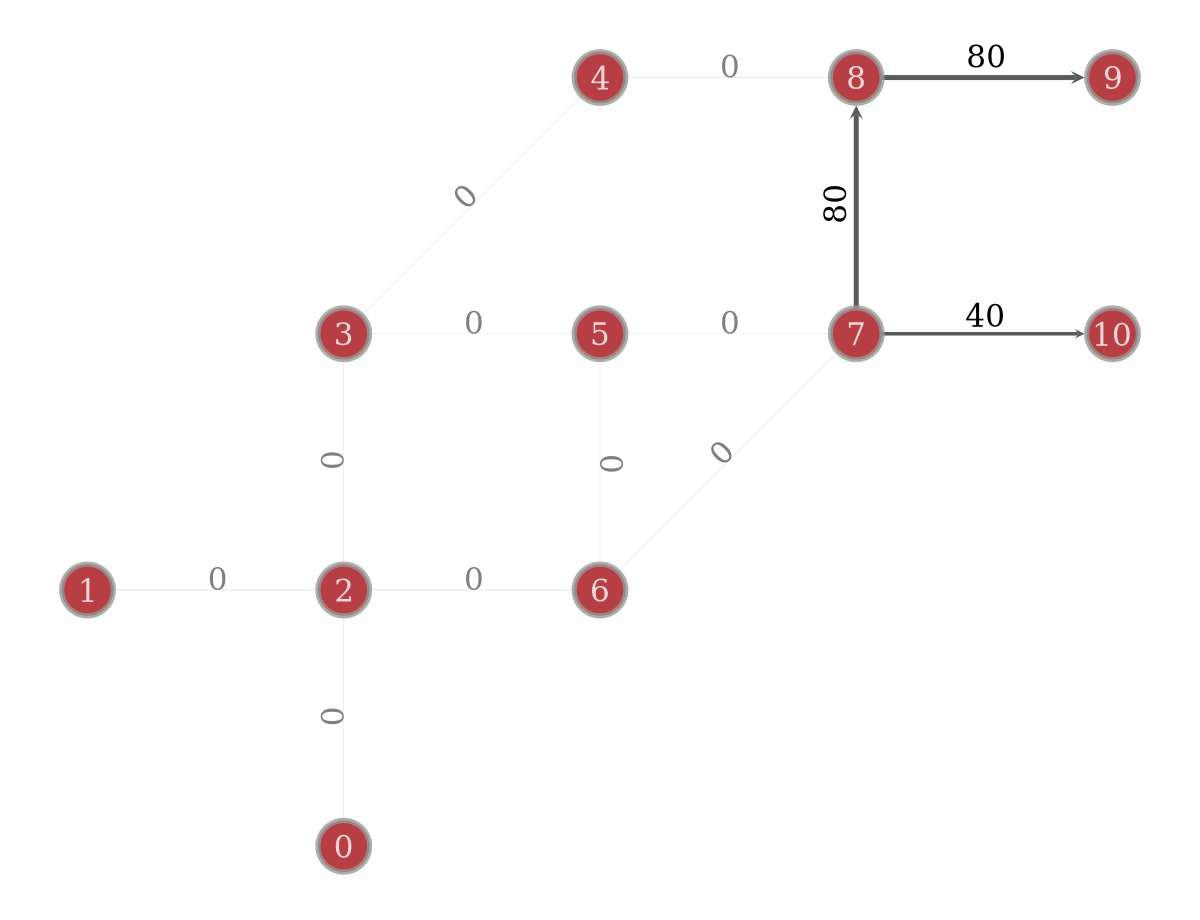

'Graph K'

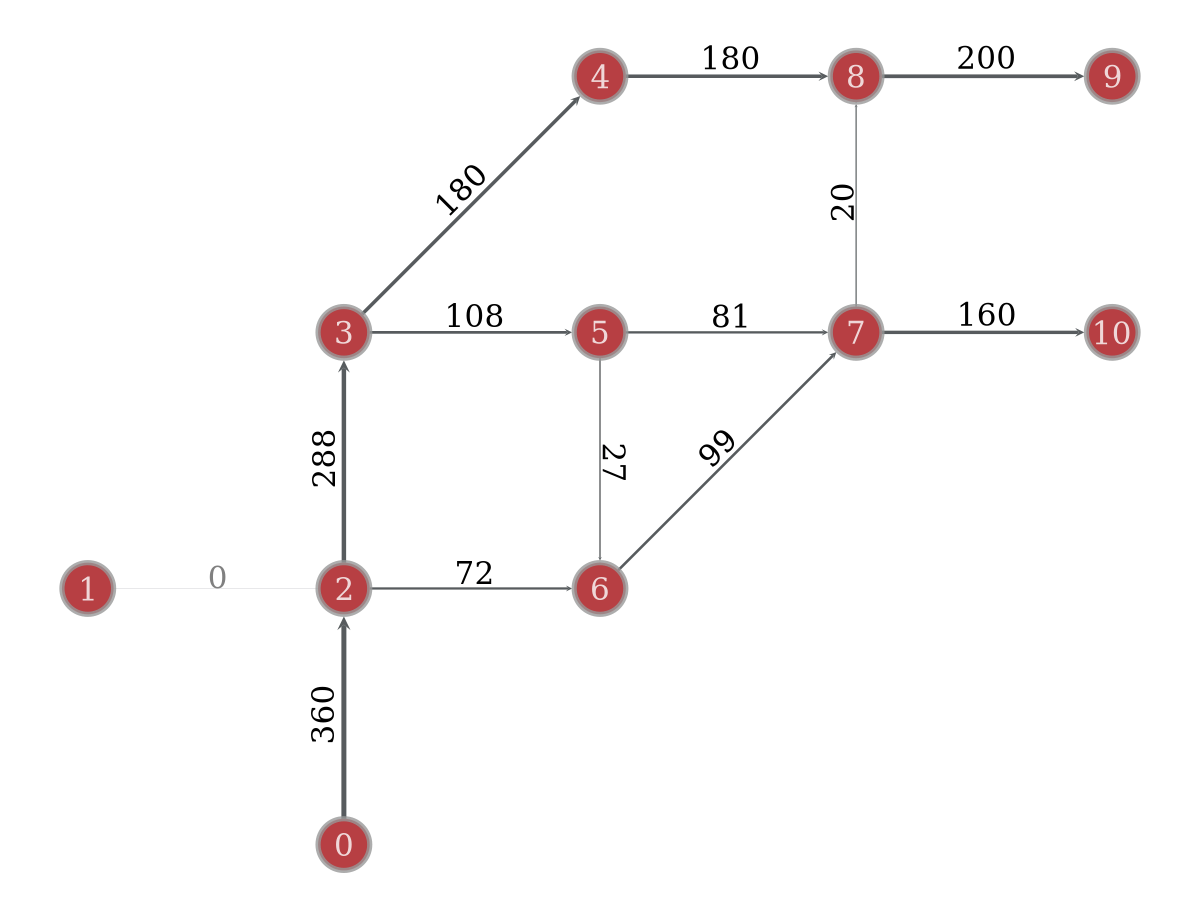

'Graph L'

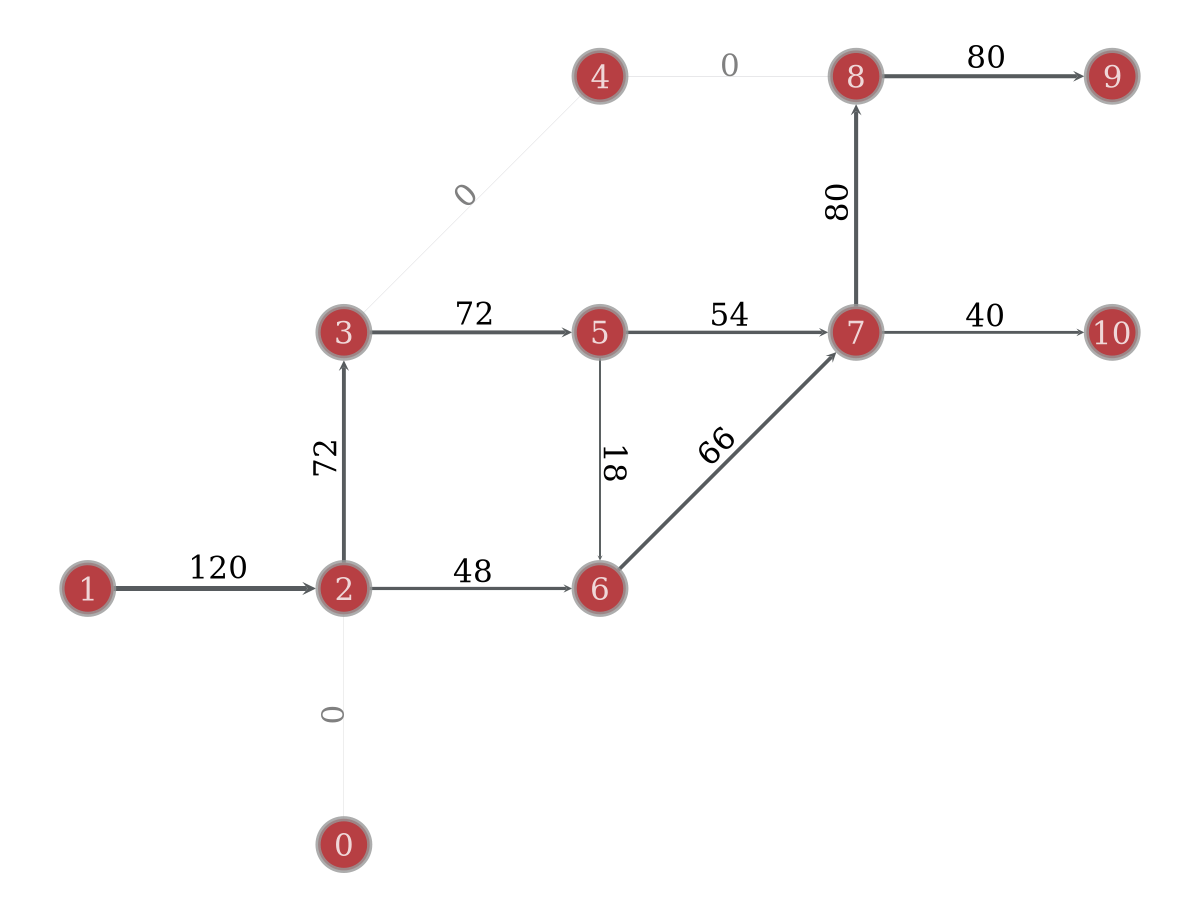

'Figure 1'

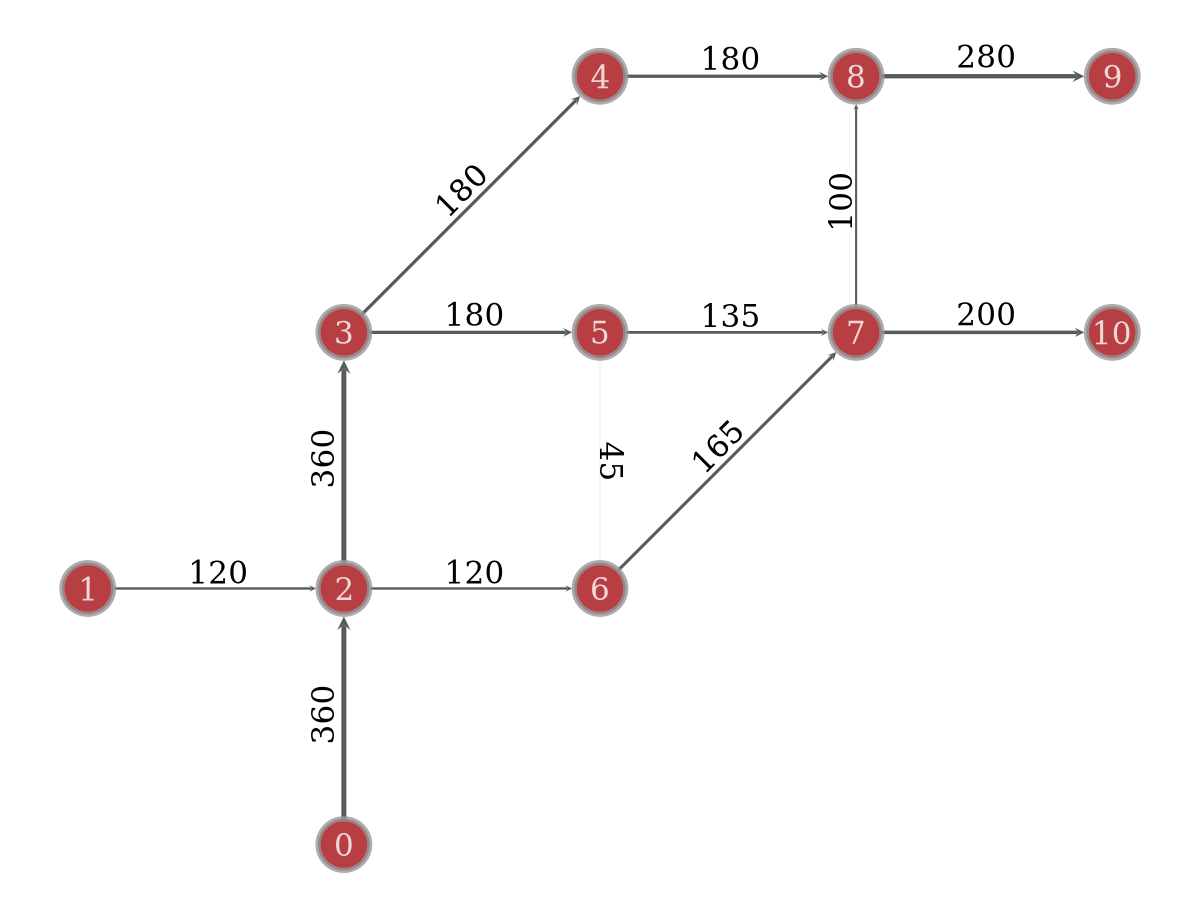

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb547310650>

In [99]:
display("Graph E")
net.draw(flows=x_n)
display("Graph F")
net.draw(flows_by_o=residuals, o=0)
display("Graph G")
net.draw(flows_by_o=residuals, o=1)
display("Graph K")
net.draw(flows_by_o=new_flows, o=0)
display("Graph L")
net.draw(flows_by_o=new_flows, o=1)
display("Figure 1")
net.draw(flows_by_o=new_flows, o="sum")